#### Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
import datetime
%matplotlib inline

In [2]:
#This file has 100,000 lines
#importing data points
df = pd.read_csv("AEP_hourly.csv")
df.head(3)

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0


In [3]:
#checking if there are any null column or rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.4+ MB


In [4]:
#imprint the idea of what may be the mean or the standard deviaiton etc in the data set. min/max etc.
df.describe()

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


In [5]:
#seperating the date and time as both are combined/together.
#creating a new data frame by using the built in function  to_datetime to seperate datetime
#can also be done for year and month etc.
df["New Date"] = pd.to_datetime(df["Datetime"]).dt.date #grabs date 
df["New Time"] = pd.to_datetime(df["Datetime"]).dt.time #grabs time 


In [6]:
df1 = df
#df.drop("New_Data", axis=1, inplace=True)
df1.head()

,Datetime,AEP_MW,New Date,New Time
0,2004-12-31 01:00:00,13478.0,2004-12-31,01:00:00
1,2004-12-31 02:00:00,12865.0,2004-12-31,02:00:00
2,2004-12-31 03:00:00,12577.0,2004-12-31,03:00:00
3,2004-12-31 04:00:00,12517.0,2004-12-31,04:00:00
4,2004-12-31 05:00:00,12670.0,2004-12-31,05:00:00


In [7]:
#highest energy consumption and which year
df1[df1["AEP_MW"] == df["AEP_MW"].max()]
#df1["AEP_MW"].max() # ---> This code shall only display AEP_MW

,Datetime,AEP_MW,New Date,New Time
30221,2008-10-20 14:00:00,25695.0,2008-10-20,14:00:00


In [8]:
df1[df1["AEP_MW"] == df["AEP_MW"].min()]

,Datetime,AEP_MW,New Date,New Time
100759,2016-10-02 05:00:00,9581.0,2016-10-02,05:00:00


<AxesSubplot:xlabel='AEP_MW'>

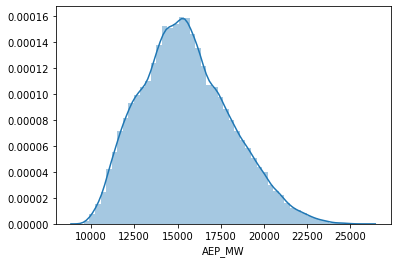

In [9]:
#using seaborn
sns.distplot(df1["AEP_MW"]) #Graph below shows distribution of AEP_MW.

In [10]:
#Seperating Years in the data set by using DatetimeIndex
df1["Year"] = pd.DatetimeIndex(df1["New Date"]).year #grabs year from New Date and puts it into a seperate column 

In [11]:
df1.head()

,Datetime,AEP_MW,New Date,New Time,Year
0,2004-12-31 01:00:00,13478.0,2004-12-31,01:00:00,2004
1,2004-12-31 02:00:00,12865.0,2004-12-31,02:00:00,2004
2,2004-12-31 03:00:00,12577.0,2004-12-31,03:00:00,2004
3,2004-12-31 04:00:00,12517.0,2004-12-31,04:00:00,2004
4,2004-12-31 05:00:00,12670.0,2004-12-31,05:00:00,2004


In [12]:
#Now that we have the info for years.
#check how many years are unique
df1["Year"].unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018], dtype=int64)

In [13]:
df1[df1["Year"] == 2013].nunique()

Datetime    8758
AEP_MW      5601
New Date     365
New Time      24
Year           1
dtype: int64

#### Relationship graph between Energy and Years

<AxesSubplot:xlabel='Year', ylabel='AEP_MW'>

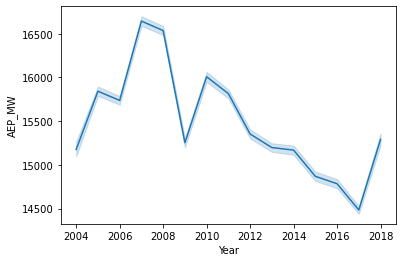

In [14]:
#Showing the relationship between Energy and Years
sns.lineplot(x = df1["Year"], y =df1["AEP_MW"], data = df1)

#### Regression 

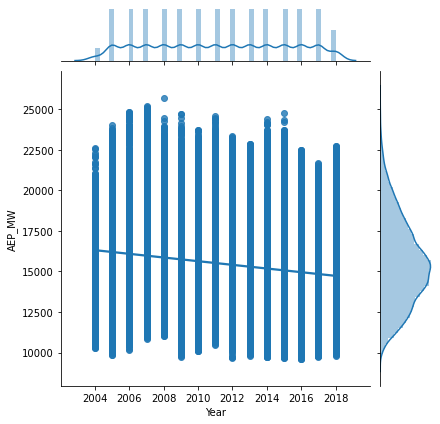

In [15]:
#Regression tasks for best fit line and where the numbers are most concentrated at.
sns.jointplot(x = df1["Year"], y = df1["AEP_MW"], data = df1, kind = "reg")

#### Kernel Density Estimation 
#### Non parametric way to estimate the probability density function of random variables. Gaussian Kernels are used.

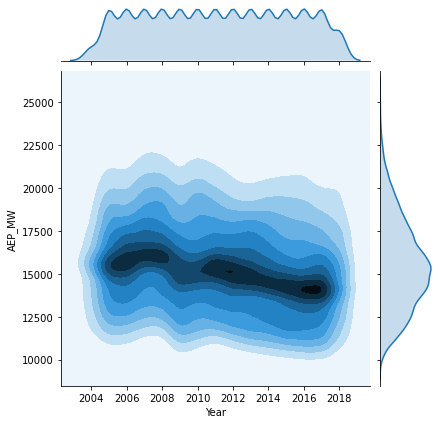

In [16]:
sns.jointplot(x = df1["Year"], y = df1["AEP_MW"], data = df1, kind = "kde")
#This method tells us that the dark dots situated between 17500 and 15000
#are the most recurring values for the entire hourly consumption